In [7]:
%matplotlib inline
import cv2

import numpy as np
import matplotlib.pyplot as plt

import os
import sys
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, '..'))

from sklearn.externals import joblib
from aye.preprocessing import *
from aye.detector import Detector
from aye.blob_analyser import *

In [2]:
# Load classifier and scaler
clf = joblib.load('../model/svc.pkl')
scaler = joblib.load('../model/scaler.pkl')
detector = Detector(clf, scaler)

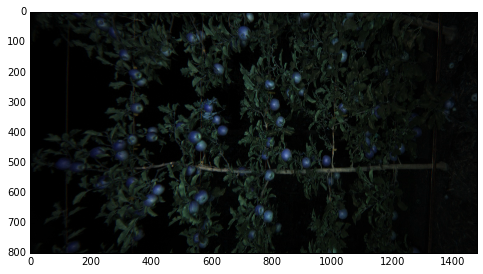

In [3]:
# Load image
im_dir = os.path.join(cwd, 'images')
im = cv2.imread(os.path.join(im_dir, 'frame0001.jpg'))
im = im[200:1000, :1480, :]

fig = plt.figure(figsize=(8,6))
plt.imshow(im, cmap=plt.cm.gray)

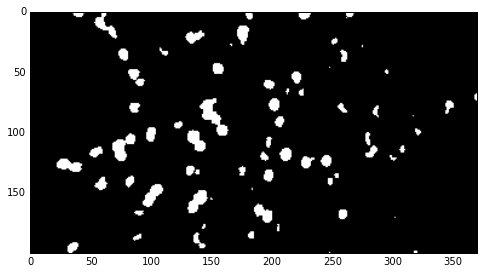

In [4]:
s, im_bw = detector.detect(im)

fig = plt.figure(figsize=(8,6))
plt.imshow(im_bw, cmap=plt.cm.gray)

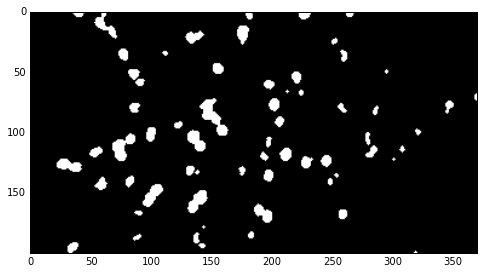

In [5]:
# Clean up
bw_clean = clean_bw

fig = plt.figure(figsize=(8,6))
plt.imshow(bw_clean, cmap=plt.cm.gray)

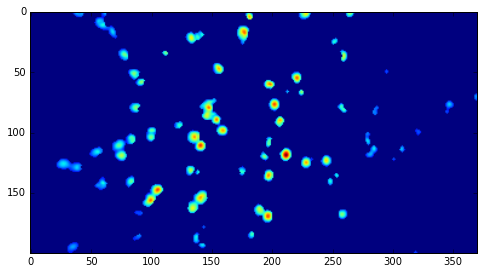

In [6]:
# Look at hsv
v = s.im_hsv[:, :, -1]
bw = bw_clean > 0
v[~bw] = 0

fig = plt.figure(figsize=(8,6))
plt.imshow(v)